In [80]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load and review Dataset

In [81]:
# Laod data
df = pd.read_csv("data/Crop_dataset.csv")

In [82]:
# Review first few rows in the dataset
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [83]:
# Review shape of the dataframe
df.shape

(2200, 8)

In [84]:
# check for NULL Values
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Looks like there are no Null values in the dataset. So, no action is required.

In [85]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


We can see the overall data distribution based on features, such as mean, median, maximum and minimum values. This provides the sense of how our data is distributed and how should we proceed. For example, we can see huge gap between the minimum and maximum value of the feature column N. This can be due to presence of some outliers or incorrect data input. We can perform further analysis to conclude.

In [86]:
# See data information in summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


# Exploratory Data Analysis

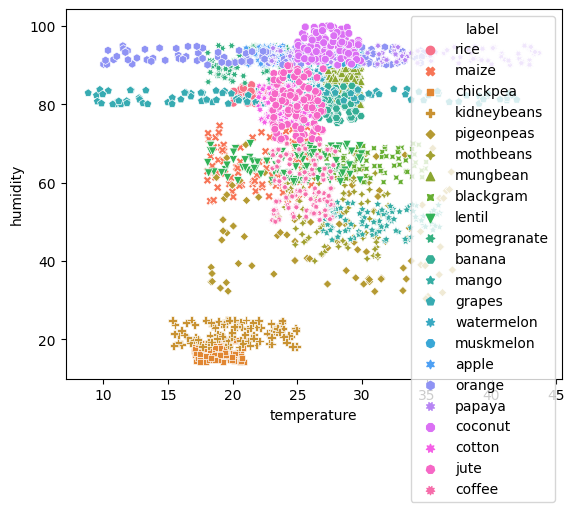

In [96]:
scatter_plot =sns.scatterplot(data=df, x='temperature', y='humidity', hue='label', style='label')
plt.show()

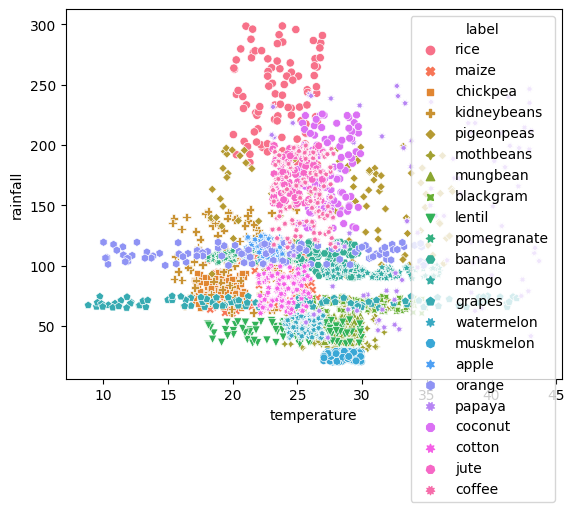

In [55]:
scatter_plot = sns.scatterplot(data=df, x='temperature', y='rainfall', hue='label', style='label')
plt.show()

From the above scatter plot we can see that temperature and rainfall are quite important features for determining which crops to grow.

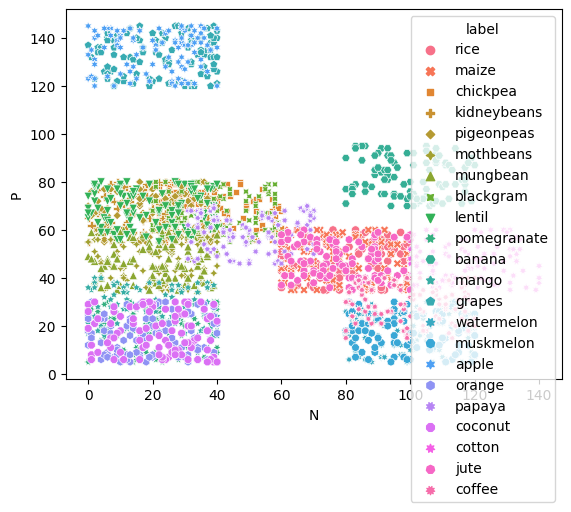

In [57]:
scatter_plot = sns.scatterplot(data=df, x='N', y='P', hue='label', style='label')
plt.show()

From the above scatter plot we can see that Nitrogen and Phsophorous content are quite important features for determining which crops to grow. We can see clusters of different crops. But, at the same time many crops are overlapping within the cluster.

<AxesSubplot: xlabel='y', ylabel='N'>

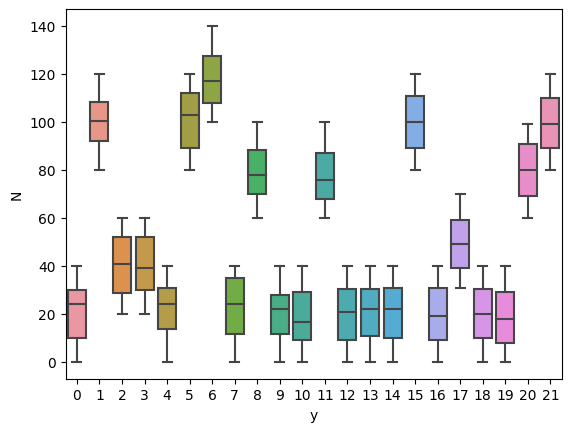

In [61]:
df['y'] = y
sns.boxplot(x = 'y', y = df['N'], data=df)

<AxesSubplot: xlabel='y', ylabel='P'>

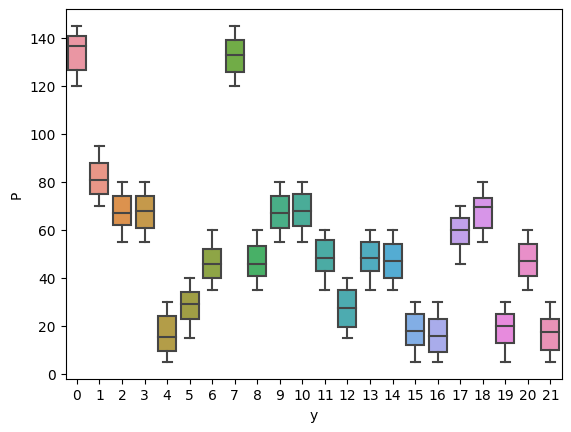

In [62]:
df['y'] = y
sns.boxplot(x = 'y', y = df['P'], data=df)

<AxesSubplot: xlabel='y', ylabel='K'>

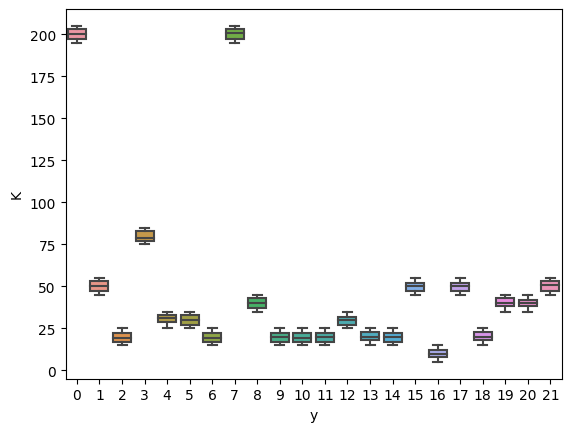

In [63]:
df['y'] = y
sns.boxplot(x = 'y', y = df['K'], data=df)

From the above three box plot, we can see that there are no outliers in the features N, P, and K as we suspected in the previous analysis. Also, the median of each box plot for each class falls in different range especially for the feature P, compared to features N and K. Thus feature **P** is more helpful in determining the target variable.

In [54]:
# Distribution of data on each class 
df.groupby(by=["label"]).count()

# We can see that the data is equally distributed for each class. 
# This is called balanced dataset and can be directly used for our analayis

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,100,100,100,100,100,100,100
banana,100,100,100,100,100,100,100
blackgram,100,100,100,100,100,100,100
chickpea,100,100,100,100,100,100,100
coconut,100,100,100,100,100,100,100
coffee,100,100,100,100,100,100,100
cotton,100,100,100,100,100,100,100
grapes,100,100,100,100,100,100,100
jute,100,100,100,100,100,100,100


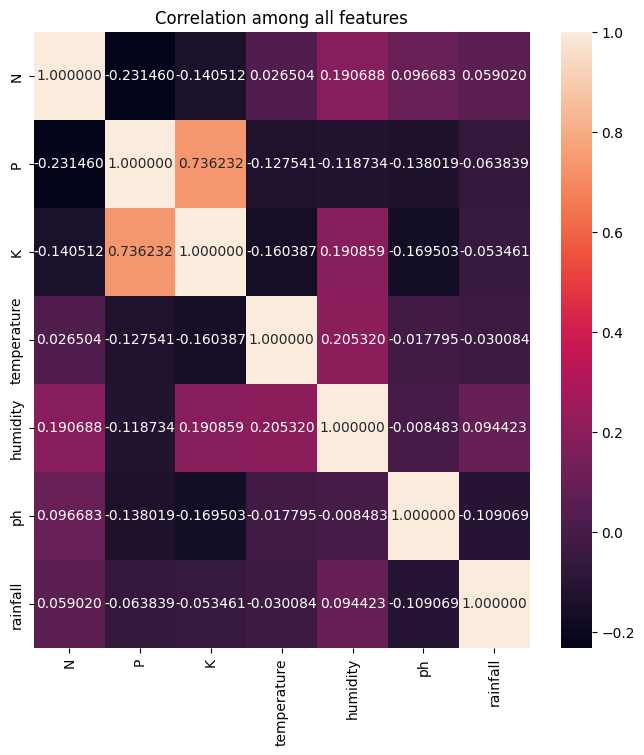

In [18]:
#  Visulaize correlations among all the variables in the dataset using heatmap
data = df.drop("label", axis = 1)
plt.subplots(figsize = (8, 8))
sns.heatmap(data.corr(), annot=True, fmt='f').set_title("Correlation among all features")
plt.show()

From the above scatter plot we can see that, feature P is highly correlated to feature K and vice versa. Thus we can only use one feature out of P and K. For others, each feature are independent of each other and are less correlated to each other and thus can contribute to the prediction of target variable.

So based on the above analysis, removing features N and K from the dataset because they are less meaningful.

In [87]:
# Preprocessing
# Convert Categorical label to numerical

# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
y = le.fit_transform(df['label'])

In [88]:
data = df.drop(['N', 'K', 'label'], axis=1)

In [89]:
# Split data to train test
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=30, random_state=42)

In [90]:
# Building Naive Bayes Model
gnb = GaussianNB()

In [91]:
# Train the model using training sample
gnb.fit(X_train, y_train)

GaussianNB()

In [92]:
# Make prediction using the trained model above
y_pred = gnb.predict(X_test)

In [98]:
# Evaluate Model performace 
acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred, average='weighted')
prec = precision_score(y_test, y_pred, average='weighted')
print("The model accuracy is {}".format(acc))
print("The model precision is {}".format(prec))
print("The model recall is {}".format(rec))

The model accuracy is 0.9333333333333333
The model precision is 0.9277777777777777
The model recall is 0.9333333333333333


If we look into the overall accuracy, precision and recall value, the model is performing pretty well. 